In [ ]:
# terminal to install qgis kernel 
#create qgis_stable kernel
conda create -y --name qgis3

#activate qgis3
conda activate qgis3

#install qgis
conda install -y -c conda-forge qgis=3.10.2 python=3.7

#install ipykernel
conda install -y -c anaconda ipykernel

/opt/conda/envs/qgis3/bin/python -m ipykernel install --user --name qgis3 --display-name qgis3


In [1]:
import sys
sys.path

['/home/jovyan/work',
 '/opt/conda/envs/postgres-env/lib/python38.zip',
 '/opt/conda/envs/postgres-env/lib/python3.8',
 '/opt/conda/envs/postgres-env/lib/python3.8/lib-dynload',
 '',
 '/opt/conda/envs/postgres-env/lib/python3.8/site-packages',
 '/opt/conda/envs/postgres-env/lib/python3.8/site-packages/IPython/extensions',
 '/home/jovyan/.ipython']

In [2]:
!python --version

Python 3.7.3


In [3]:
import sys
!{sys.executable} --version

Python 3.8.2


In [7]:
sys.path.append('/opt/conda/envs/postgres-env/share/qgis/python/plugins')
sys.path.append('/opt/conda/envs/postgres-env/share/qgis/python')
sys.path.append('/opt/conda/envs/postgres-env/bin')


In [8]:
sys.path

['/home/jovyan/work',
 '/opt/conda/envs/postgres-env/lib/python38.zip',
 '/opt/conda/envs/postgres-env/lib/python3.8',
 '/opt/conda/envs/postgres-env/lib/python3.8/lib-dynload',
 '',
 '/opt/conda/envs/postgres-env/lib/python3.8/site-packages',
 '/opt/conda/envs/postgres-env/lib/python3.8/site-packages/IPython/extensions',
 '/home/jovyan/.ipython',
 '/opt/conda/envs/postgres_envex/share/qgis/python/plugins',
 '/opt/conda/envs/postgres_envex/share/qgis/python',
 '/opt/conda/envs/postgres_envex/bin',
 '/opt/conda/envs/postgres-env/share/qgis/python/plugins',
 '/opt/conda/envs/postgres-env/share/qgis/python',
 '/opt/conda/envs/postgres-env/bin']

In [9]:
import qgis

In [28]:
#from qgis.core import *
from qgis.core import Qgis, QgsProject, QgsMapSettings

In [10]:
import qgis.utils
qgis.utils.Qgis.QGIS_VERSION

'3.12.0-București'

In [11]:
#A way to figure out whether the version is >=3.0 or not seems to be
hasattr(qgis.utils, 'Qgis')

True

In [20]:
from pathlib import Path
from qgis.core import Qgis, QgsProject, QgsMapSettings

projectpath = Path('./qgis_data/france_parts.qgs')
prj = QgsProject()

In [21]:
projectpath.absolute()

PosixPath('/home/jovyan/work/qgis_data/france_parts.qgs')

In [22]:
prj.read(str(projectpath.absolute()))

True

In [23]:
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from qgis.core import QgsMapRendererParallelJob

from PyQt5.QtGui import QPainter, QColor, QPen

layers = prj.mapLayersByName('france_parts')

print(layers, len(layers))

xt     = layers[0].extent()
width  = 1200
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers(layers)
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
       
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

[<QgsMapLayer: 'france_parts' (ogr)>] 1


In [24]:
from PyQt5.QtGui import QPixmap, QImage                                
from PyQt5.QtCore import Qt 

width, height = image.width(), image.height()

img = image.convertToFormat(QImage.Format_RGBA8888)
ptr = img.constBits()
ptr.setsize(height * width * 4)
arr = np.frombuffer(ptr, np.uint8).reshape((height, width, 4))


1200 501


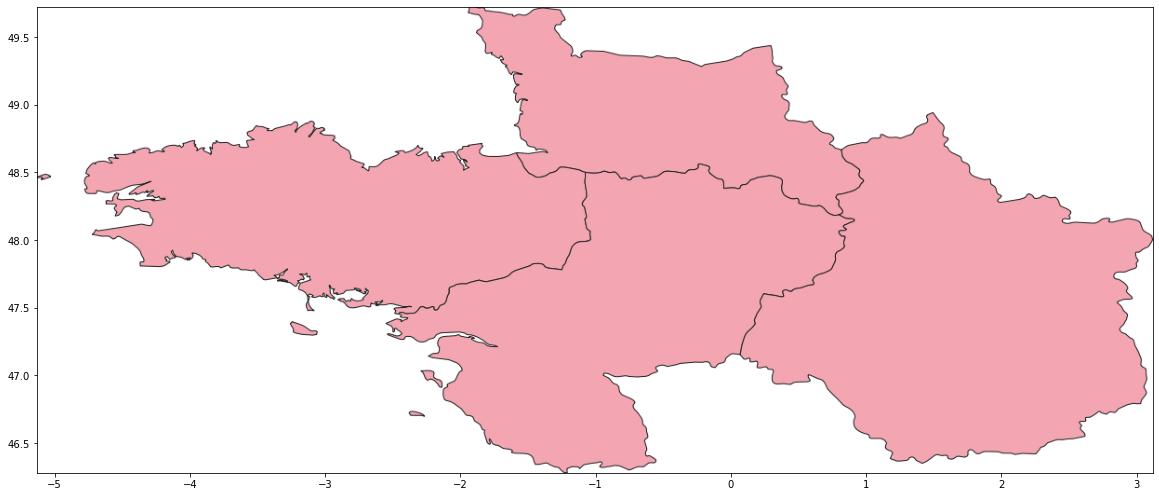

In [25]:
print(width,height)
xt = layers[0].extent()
plt.figure(figsize=(20,20))
plt.imshow(arr, extent=(xt.xMinimum(),xt.xMaximum(),xt.yMinimum(),xt.yMaximum()))

In [26]:
def to_png(image):
    """ Get as PNG
    """
    imgbuf= QBuffer()
    imgbuf.open(QIODevice.ReadWrite)
    image.save(imgbuf,"PNG")
    # Return a QByteArray
    return imgbuf.data()

def render_layer(qgspath,laybername):

    #
    projectpath = Path(qgspath)

    prj = QgsProject()
    prj.read(str(projectpath.absolute()))

    layers = layers = prj.mapLayersByName(laybername)

    xt     = layers[0].extent()
    width  = 1200
    height = int(width*xt.height()/xt.width())

    options = QgsMapSettings()
    options.setLayers(layers)
    options.setBackgroundColor(QColor(255, 255, 255))
    options.setOutputSize(QSize(width, height))
    options.setExtent(xt)
           
    render = QgsMapRendererParallelJob(options)
    render.start()
    render.waitForFinished()

    image = render.renderedImage()

    return image

In [27]:
image = to_png(render_layer('./data/france_parts.qgs','france_parts'))
with open('france_parts-1.png','wb') as fp:
    fp.write(image)

In [12]:
import sys
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from osgeo import ogr
from qgis.core import (
     QgsApplication,
     QgsProcessingFeedback,
     QgsVectorLayer
)
from qgis.analysis import QgsNativeAlgorithms

In [14]:
from qgis.core import *
# qgs path set
#QgsApplication.setPrefixPath(r'/opt/conda/envs/qgis3/', True)
#QgsApplication.setPrefixPath("/opt/conda/envs/qgis3/share/", True)
# Not using GUI with false
#qgs = QgsApplication([], False)
#qgis init
#qgs.initQgis()
import processing
from processing.core.Processing import Processing
Processing.initialize()
#QgsApplication.processingRegistry().addProvider(QgsNativeAlgorithms())

print (len(QgsApplication.processingRegistry().algorithms()))
#

517


In [15]:
for alg in QgsApplication.processingRegistry().algorithms():
       print(alg.id(), "--->", alg.displayName())

gdal:aspect ---> Aspect
gdal:assignprojection ---> Assign projection
gdal:buffervectors ---> Buffer vectors
gdal:buildvirtualraster ---> Build virtual raster
gdal:buildvirtualvector ---> Build virtual vector
gdal:cliprasterbyextent ---> Clip raster by extent
gdal:cliprasterbymasklayer ---> Clip raster by mask layer
gdal:clipvectorbyextent ---> Clip vector by extent
gdal:clipvectorbypolygon ---> Clip vector by mask layer
gdal:colorrelief ---> Color relief
gdal:contour ---> Contour
gdal:convertformat ---> Convert format
gdal:dissolve ---> Dissolve
gdal:executesql ---> Execute SQL
gdal:extractprojection ---> Extract projection
gdal:fillnodata ---> Fill nodata
gdal:gdal2tiles ---> gdal2tiles
gdal:gdal2xyz ---> gdal2xyz
gdal:gdalinfo ---> Raster information
gdal:gridaverage ---> Grid (Moving average)
gdal:griddatametrics ---> Grid (Data metrics)
gdal:gridinversedistance ---> Grid (Inverse distance to a power)
gdal:gridinversedistancenearestneighbor ---> Grid (IDW with nearest neighbor searc

In [16]:
qgisTerm = "native"
grassTerm = "grass"
gdalTerm = "gdal"
cntqgis  = 0
cntgrass = 0
cntgdal  = 0
for alg in QgsApplication.processingRegistry().algorithms():
    if qgisTerm in alg.id():
        cntqgis = cntqgis+1
        continue
        #print(cnt, alg.id(), "--->", alg.displayName())
    if grassTerm in alg.id():
        cntgrass = cntgrass+1
        continue
    if gdalTerm in alg.id():
        cntgdal = cntgdal+1
        continue

print ("The size of QGIS Algorithms is",cntqgis)
print ("The size of GRASS7 Algorithms is",cntgrass)
print ("The size of GDAL Algorithms is",cntgdal)

The size of QGIS Algorithms is 162
The size of GRASS7 Algorithms is 301
The size of GDAL Algorithms is 54


In [17]:
searchTerm = "shortestpath"
cnt = 0
for alg in QgsApplication.processingRegistry().algorithms():
    if searchTerm in alg.id():
        cnt = cnt+1
        print(cnt, alg.id(), "--->", alg.displayName())

1 native:shortestpathlayertopoint ---> Shortest path (layer to point)
2 native:shortestpathpointtolayer ---> Shortest path (point to layer)
3 native:shortestpathpointtopoint ---> Shortest path (point to point)


In [18]:
searchTerm = "buffer"
for alg in QgsApplication.processingRegistry().algorithms():
    if searchTerm in alg.id():
        print(alg.id(), "--->", alg.displayName())

gdal:buffervectors ---> Buffer vectors
gdal:onesidebuffer ---> One side buffer
grass7:r.buffer ---> r.buffer
grass7:r.buffer.lowmem ---> r.buffer.lowmem
grass7:v.buffer ---> v.buffer
native:buffer ---> Buffer
native:bufferbym ---> Variable width buffer (by M value)
native:multiringconstantbuffer ---> Multi-ring buffer (constant distance)
native:singlesidedbuffer ---> Single sided buffer
native:taperedbuffer ---> Tapered buffers
native:wedgebuffers ---> Create wedge buffers


In [19]:
processing.algorithmHelp("native:buffer")

Buffer (native:buffer)

This algorithm computes a buffer area for all the features in an input layer, using a fixed or dynamic distance.

The segments parameter controls the number of line segments to use to approximate a quarter circle when creating rounded offsets.

The end cap style parameter controls how line endings are handled in the buffer.

The join style parameter specifies whether round, miter or beveled joins should be used when offsetting corners in a line.

The miter limit parameter is only applicable for miter join styles, and controls the maximum distance from the offset curve to use when creating a mitered join.


----------------
Input parameters
----------------

INPUT: Input layer

	Parameter type:	QgsProcessingParameterFeatureSource

	Accepted data types:
		- str: layer ID
		- str: layer name
		- str: layer source
		- QgsProcessingFeatureSourceDefinition
		- QgsProperty
		- QgsVectorLayer

DISTANCE: Distance

	Parameter type:	QgsProcessingParameterDistance

	Accepte

In [29]:
inputvector = QgsVectorLayer(r"./qgis_data/france_parts/france_parts.shp")#test.geojson

In [31]:
source = "./qgis_data/france_parts/france_parts.shp"
import geopandas as gpd
fig, ax = plt.subplots(figsize = (10,10))
gpd.read_file(source).plot(ax=ax);

CRSError: Invalid datum string: urn:ogc:def:datum:EPSG::6326: (Internal Proj Error: proj_create: SQLite error on SELECT name, ellipsoid_auth_name, ellipsoid_code, prime_meridian_auth_name, prime_meridian_code, area_of_use_auth_name, area_of_use_code, publication_date, deprecated FROM geodetic_datum WHERE auth_name = ? AND code = ?: no such column: publication_date)

In [32]:
processing.algorithmHelp("native:extractvertices")

Extract vertices (native:extractvertices)

This algorithm takes a line or polygon layer and generates a point layer with points representing the vertices in the input lines or polygons. The attributes associated to each point are the same ones associated to the line or polygon that the point belongs to.

Additional fields are added to the point indicating the vertex index (beginning at 0), the vertex’s part and its index within the part (as well as its ring for polygons), distance along original geometry and bisector angle of vertex for original geometry.


----------------
Input parameters
----------------

INPUT: Input layer

	Parameter type:	QgsProcessingParameterFeatureSource

	Accepted data types:
		- str: layer ID
		- str: layer name
		- str: layer source
		- QgsProcessingFeatureSourceDefinition
		- QgsProperty
		- QgsVectorLayer

OUTPUT: Vertices

	Parameter type:	QgsProcessingParameterFeatureSink

	Accepted data types:
		- str: destination vector file, e.g. 'd:/test.shp'
		- st

NameError: name 'gpd' is not defined

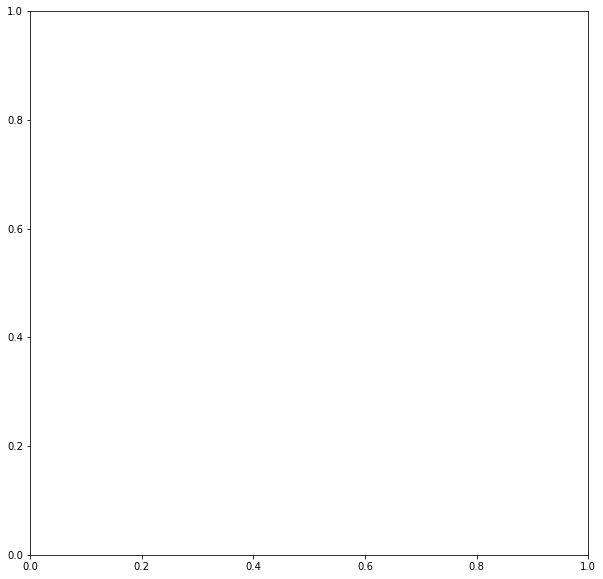

In [33]:
vertice_out = r"./qgis_data/out_vertices.geojson"
# just delete the output if exist
if os.path.exists(vertice_out):
    os.remove(vertice_out)
else:
    pass
params = {
    'INPUT': inputvector,
    'OUTPUT': vertice_out
}
feedback = QgsProcessingFeedback()
processing.run("native:extractvertices", params, feedback=feedback)
fig, ax = plt.subplots(figsize = (10,10))
#gpd.read_file(vertice_out).plot(ax=ax);

In [34]:
processing.algorithmHelp("native:buffer")

Buffer (native:buffer)

This algorithm computes a buffer area for all the features in an input layer, using a fixed or dynamic distance.

The segments parameter controls the number of line segments to use to approximate a quarter circle when creating rounded offsets.

The end cap style parameter controls how line endings are handled in the buffer.

The join style parameter specifies whether round, miter or beveled joins should be used when offsetting corners in a line.

The miter limit parameter is only applicable for miter join styles, and controls the maximum distance from the offset curve to use when creating a mitered join.


----------------
Input parameters
----------------

INPUT: Input layer

	Parameter type:	QgsProcessingParameterFeatureSource

	Accepted data types:
		- str: layer ID
		- str: layer name
		- str: layer source
		- QgsProcessingFeatureSourceDefinition
		- QgsProperty
		- QgsVectorLayer

DISTANCE: Distance

	Parameter type:	QgsProcessingParameterDistance

	Accepte

In [ ]:
buf_out = r"./qgis_data/buffer_output.geojson"
# just delete the output if exist
if os.path.exists(buf_out):
    os.remove(buf_out)
else:
    pass
params = {
    'INPUT': inputvector,
    'DISTANCE': 50,
    'SEGMENTS': 5,
    'END_CAP_STYLE':0,
    'JOIN_STYLE':0,
    'MITER_LIMIT':2,
    'DISSOLVE': False,
    'OUTPUT': buf_out
}
feedback = QgsProcessingFeedback()
processing.run("native:buffer", params, feedback=feedback)
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
gpd.read_file(buf_out).plot(ax=ax);